# **Website visitor count analysis for different medical consultation websites.**

In [1]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# Importing libraries
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import requests
from termcolor import colored

In [3]:
# Importing dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/Website visitor count.csv', engine='python')

In [4]:
# Viewing the dataframe
data

,Names,Website,Bounce_rate (%),Pages per Visit,Monthly Visits (M),Avg. Visit Duration (s),Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21
0,1mg,https://www.1mg.com/,60.57,3.08,27.2000,148.0,23.78000,26.83000,38.17000,41.85000,28.55000,27.18000
1,Myupchar,https://www.myupchar.com/,53.13,2.92,9.0000,165.0,8.95000,9.39000,10.40000,12.02000,9.49000,9.02000
2,Pharmeasy,https://pharmeasy.in/,66.26,2.98,7.0000,152.0,5.00000,6.15000,12.75000,16.91000,11.62000,6.97000
3,Netmeds,https://www.netmeds.com/,61.52,2.68,6.4000,110.0,5.39000,6.43000,9.16000,11.28000,7.17000,6.35000
4,Medplusmart,https://www.medplusmart.com/,70.19,2.45,3.1000,128.0,2.92000,3.21000,4.01000,5.01000,3.08000,3.08000
5,Docplus,https://docplus.online/,NaN,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tatahealth,https://www.tatahealth.com/dashboard,46.24,1.72,3.4000,51.0,1.57000,1.79000,5.70000,5.66000,3.24000,3.37000
7,Practo,https://www.practo.com/,55.22,2.88,11.3000,175.0,10.17000,10.99000,11.56000,12.58000,10.87000,11.33000
8,Docsapp,https://www.docsapp.in/,73.00,3.38,0.8094,184.0,0.26718,0.37926,0.57160,0.98563,1.03000,0.80940
9,Icliniq,https://www.icliniq.com/en_IN/,59.63,2.75,0.5804,102.0,0.56464,0.57752,0.48852,0.63524,0.53427,0.58042


**Description of the variables :**
1. Bounce rate : Bounce rate is an Internet marketing term used in web traffic analysis. It represents the percentage of visitors who enter the site and then leave rather than continuing to view other pages within the same site. A low Bounce Rate means that the website is doing well and a high Bounce rate means there could be an issue with the website's design, usability, SEO/content or functionality. A normal Bounce rate is between 40 % to 60 %.
When analyzing a specific page's performance on Google Analytics, a 0 % bounce rate indicates the user did not arrive on that page from an external traffic source. A 100 % bounce rate means that every single person who visited the landing page left the website from the landing page without browsing any further. 
2. Pages per visit : Pages per visit is a Web analytics measure of how many pieces of content (Web pages) a particular user or group of users views on a single website. Pages per visit is usually displayed as an average, which is calculated by dividing the total number of page views by the total number of visitors. The unofficial industry standard is 2 pages per session. For most sites, the goal is to keep users engaged, nurture their interest, and get them to take the next step. More pages per session often indicates that the users are highly engaged and willing to explore more of the site.
3. Monthly visit : A monthly unique visitor refers to an individual who visits a website at least once within a given month. An individual visitor during that reporting period is counted only once. For an average small firm or industry, 1000 visitors per month is a good amount of traffic.
4. Average visit duration : To calculate average visit duration, Analytics sums the duration of each session during the date range we specify and divides that sum by the total number of sessions. For a good average session duration, the industry standard is 2 - 3 minutes.

In [67]:
# Names of columns
data.columns

Index(['Names', 'Website', 'Bounce_rate (%)', 'Pages per Visit',
       'Monthly Visits (M)', 'Avg. Visit Duration (s)', 'Feb-21', 'Mar-21',
       'Apr-21', 'May-21', 'Jun-21', 'Jul-21'],
      dtype='object')

In [5]:
# Printing response status code for websites
for websites in data['Website']:
  print(websites)
  try:
    response= requests.get(websites)
    print('This website is available and its response status code is :',response.status_code)
  except:
    print('This website is not available.')

https://www.1mg.com/
This website is available and its response status code is : 200
https://www.myupchar.com/
This website is available and its response status code is : 200
https://pharmeasy.in/
This website is available and its response status code is : 200
https://www.netmeds.com/
This website is available and its response status code is : 200
https://www.medplusmart.com/
This website is available and its response status code is : 403
https://docplus.online/
This website is available and its response status code is : 200
https://www.tatahealth.com/dashboard
This website is available and its response status code is : 200
https://www.practo.com/
This website is available and its response status code is : 200
https://www.docsapp.in/
This website is available and its response status code is : 200
https://www.icliniq.com/en_IN/
This website is available and its response status code is : 200
https://www.mfine.co/
This website is available and its response status code is : 200
https://myd

**As the website : docplus.online has less than 50,000 views per month, so its visitor count data is not available.**

In [6]:
# Dropping docplus due to lack of data and mydoctor website as it it an invalid website
data.drop([5, 11], axis= 0, inplace= True) 

In [7]:
# Updated dataframe
data

,Names,Website,Bounce_rate (%),Pages per Visit,Monthly Visits (M),Avg. Visit Duration (s),Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21
0,1mg,https://www.1mg.com/,60.57,3.08,27.2000,148.0,23.78000,26.83000,38.17000,41.85000,28.55000,27.18000
1,Myupchar,https://www.myupchar.com/,53.13,2.92,9.0000,165.0,8.95000,9.39000,10.40000,12.02000,9.49000,9.02000
2,Pharmeasy,https://pharmeasy.in/,66.26,2.98,7.0000,152.0,5.00000,6.15000,12.75000,16.91000,11.62000,6.97000
3,Netmeds,https://www.netmeds.com/,61.52,2.68,6.4000,110.0,5.39000,6.43000,9.16000,11.28000,7.17000,6.35000
4,Medplusmart,https://www.medplusmart.com/,70.19,2.45,3.1000,128.0,2.92000,3.21000,4.01000,5.01000,3.08000,3.08000
6,Tatahealth,https://www.tatahealth.com/dashboard,46.24,1.72,3.4000,51.0,1.57000,1.79000,5.70000,5.66000,3.24000,3.37000
7,Practo,https://www.practo.com/,55.22,2.88,11.3000,175.0,10.17000,10.99000,11.56000,12.58000,10.87000,11.33000
8,Docsapp,https://www.docsapp.in/,73.00,3.38,0.8094,184.0,0.26718,0.37926,0.57160,0.98563,1.03000,0.80940
9,Icliniq,https://www.icliniq.com/en_IN/,59.63,2.75,0.5804,102.0,0.56464,0.57752,0.48852,0.63524,0.53427,0.58042
10,Mfine,https://www.mfine.co/,77.39,1.67,1.0000,38.0,0.65995,0.74839,0.86356,1.04000,0.81323,1.00000


In [43]:
# Brief information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 10
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Names                    10 non-null     object 
 1   Website                  10 non-null     object 
 2   Bounce_rate (%)          10 non-null     float64
 3   Pages per Visit          10 non-null     float64
 4   Monthly Visits (M)       10 non-null     float64
 5   Avg. Visit Duration (s)  10 non-null     float64
 6   Feb-21                   10 non-null     float64
 7   Mar-21                   10 non-null     float64
 8   Apr-21                   10 non-null     float64
 9   May-21                   10 non-null     float64
 10  Jun-21                   10 non-null     float64
 11  Jul-21                   10 non-null     float64
dtypes: float64(10), object(2)
memory usage: 1.3+ KB


In [47]:
# Description of dataframe
data.describe().round(decimals= 3)

,Bounce_rate (%),Pages per Visit,Monthly Visits (M),Avg. Visit Duration (s),Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21
count,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
mean,62.315,2.651,6.979,125.300,5.927,6.650,9.367,10.797,7.640,6.969
std,9.563,0.561,7.990,50.162,7.177,8.030,11.144,12.298,8.486,7.990
min,46.240,1.670,0.580,38.000,0.267,0.379,0.489,0.635,0.534,0.580
25%,56.322,2.508,1.525,104.000,0.887,1.009,1.650,2.032,1.542,1.520
50%,61.045,2.815,4.900,138.000,3.960,4.680,7.430,8.470,5.205,4.860
75%,69.208,2.965,8.500,161.750,8.060,8.650,11.270,12.440,10.525,8.508
max,77.390,3.380,27.200,184.000,23.780,26.830,38.170,41.850,28.550,27.180


In [31]:
# Total number of 6 months views in millions for different websites :
print(colored('Total number of 6 month views in millions for different websites :', color= 'green', attrs= ['bold'] ))
mg_6_month_views= data['Feb-21'][0] + data['Mar-21'][0] + data['Apr-21'][0] + data['May-21'][0] + data['Jun-21'][0] + data['Jul-21'][0]
print('1mg :', mg_6_month_views)
myupchar_6_month_views= (data['Feb-21'][1] + data['Mar-21'][1] + data['Apr-21'][1] + data['May-21'][1] + data['Jun-21'][1] + data['Jul-21'][1]).round(decimals= 3)
print('Myupchar :', myupchar_6_month_views)
pharmeasy_6_month_views= data['Feb-21'][2] + data['Mar-21'][2] + data['Apr-21'][2] + data['May-21'][2] + data['Jun-21'][2] + data['Jul-21'][2]
print('Pharmeasy :', pharmeasy_6_month_views)
netmeds_6_month_views= data['Feb-21'][3] + data['Mar-21'][3] + data['Apr-21'][3] + data['May-21'][3] + data['Jun-21'][3] + data['Jul-21'][3]
print('Netmeds :', netmeds_6_month_views)
medplusmart_6_month_views= (data['Feb-21'][4] + data['Mar-21'][4] + data['Apr-21'][4] + data['May-21'][4] + data['Jun-21'][4] + data['Jul-21'][4]).round(decimals= 3)
print('Medplusmart :', medplusmart_6_month_views)
tatahealth_6_month_views= (data['Feb-21'][6] + data['Mar-21'][6] + data['Apr-21'][6] + data['May-21'][6] + data['Jun-21'][6] + data['Jul-21'][6]).round(decimals= 3)
print('Tatahealth :', tatahealth_6_month_views)
practo_6_month_views= (data['Feb-21'][7] + data['Mar-21'][7] + data['Apr-21'][7] + data['May-21'][7] + data['Jun-21'][7] + data['Jul-21'][7]).round(decimals= 3)
print('Practo :', practo_6_month_views)
docsapp_6_month_views= (data['Feb-21'][8] + data['Mar-21'][8] + data['Apr-21'][8] + data['May-21'][8] + data['Jun-21'][8] + data['Jul-21'][8]).round(decimals= 3)
print('Docsapp :', docsapp_6_month_views)
icliniq_6_month_views= (data['Feb-21'][9] + data['Mar-21'][9] + data['Apr-21'][9] + data['May-21'][9] + data['Jun-21'][9] + data['Jul-21'][9]).round(decimals= 3)
print('Icliniq :', icliniq_6_month_views)
mfine_6_month_views= (data['Feb-21'][10] + data['Mar-21'][10] + data['Apr-21'][10] + data['May-21'][10] + data['Jun-21'][10] + data['Jul-21'][10]).round(decimals= 3)
print('Mfine :', mfine_6_month_views)

Total number of 6 month views in millions for different websites :
1mg : 186.36
Myupchar : 59.27
Pharmeasy : 59.4
Netmeds : 45.78
Medplusmart : 21.31
Tatahealth : 21.33
Practo : 67.5
Docsapp : 4.043
Icliniq : 3.381
Mfine : 5.125


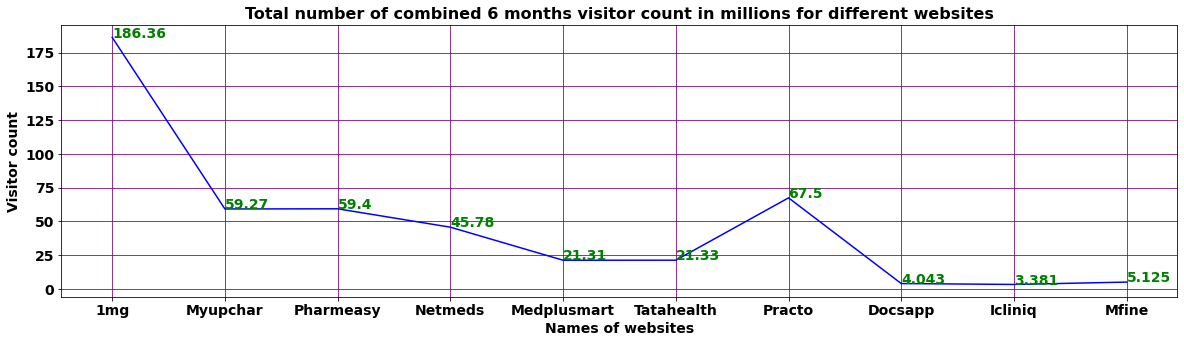

In [9]:
# Line plot regarding this
plt.figure(figsize= (20, 5))
x= data['Names']
y= mg_6_month_views, myupchar_6_month_views, pharmeasy_6_month_views, netmeds_6_month_views, medplusmart_6_month_views, tatahealth_6_month_views, practo_6_month_views, docsapp_6_month_views, icliniq_6_month_views, mfine_6_month_views
plt.plot(x, y, color= 'blue')
plt.title('Total number of combined 6 months visitor count in millions for different websites', fontsize= 16, fontweight= 'bold')
plt.xlabel('Names of websites', fontsize= 14, fontweight= 'bold')
plt.ylabel('Visitor count', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 14, fontweight= 'bold')
plt.yticks(fontsize= 14, fontweight= 'bold')
plt.grid(color= 'purple')
for x, y in zip(x, y):
  plt.text(x, y, str(y), color= 'green', fontsize= 14, fontweight= 'bold')
plt.show()

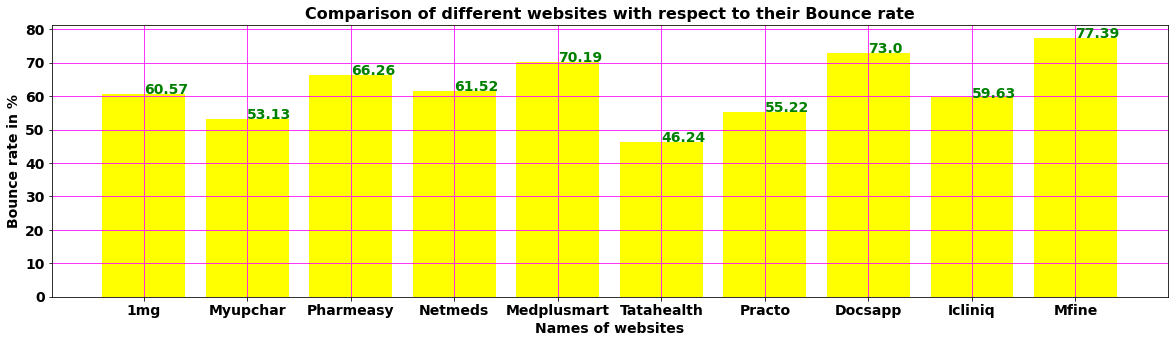

In [10]:
# Comparison of different websites with respect to their Bounce rate in %
plt.figure(figsize= (20, 5))
plt.bar(data['Names'], data['Bounce_rate (%)'], color= 'yellow')
plt.title('Comparison of different websites with respect to their Bounce rate', fontsize= 16, fontweight= 'bold')
plt.xlabel('Names of websites', fontsize= 14, fontweight= 'bold')
plt.ylabel('Bounce rate in %', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 14, fontweight= 'bold')
plt.yticks(fontsize= 14, fontweight= 'bold')
plt.grid(color= 'magenta')
for x, y in zip(data['Names'], data['Bounce_rate (%)']):
  plt.text(x, y, str(y), color= 'green', fontsize= 14, fontweight= 'bold')
plt.show()

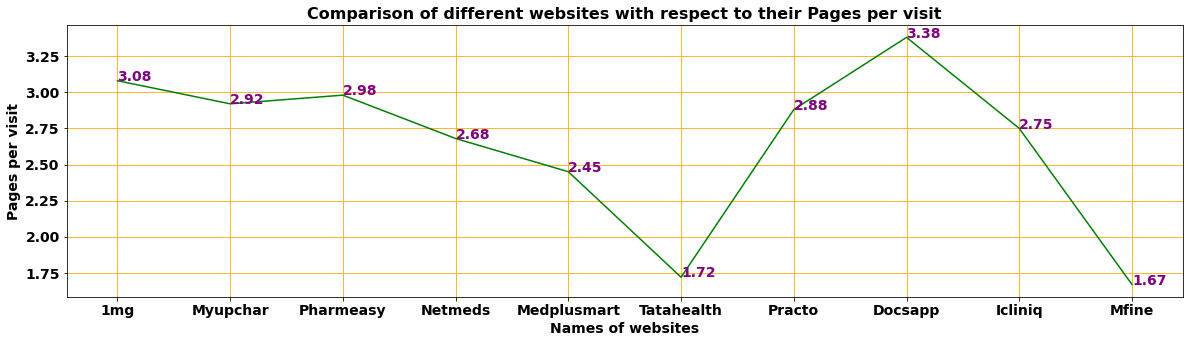

In [11]:
# Comparison of different websites with respect to their Pages per Visit
plt.figure(figsize= (20, 5))
plt.plot(data['Names'], data['Pages per Visit'], color= 'green')
plt.title('Comparison of different websites with respect to their Pages per visit', fontsize= 16, fontweight= 'bold')
plt.xlabel('Names of websites', fontsize= 14, fontweight= 'bold')
plt.ylabel('Pages per visit', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 14, fontweight= 'bold')
plt.yticks(fontsize= 14, fontweight= 'bold')
plt.grid(color= 'orange')
for x, y in zip(data['Names'], data['Pages per Visit']):
  plt.text(x, y, str(y), color= 'purple', fontsize= 14, fontweight= 'bold')
plt.show()

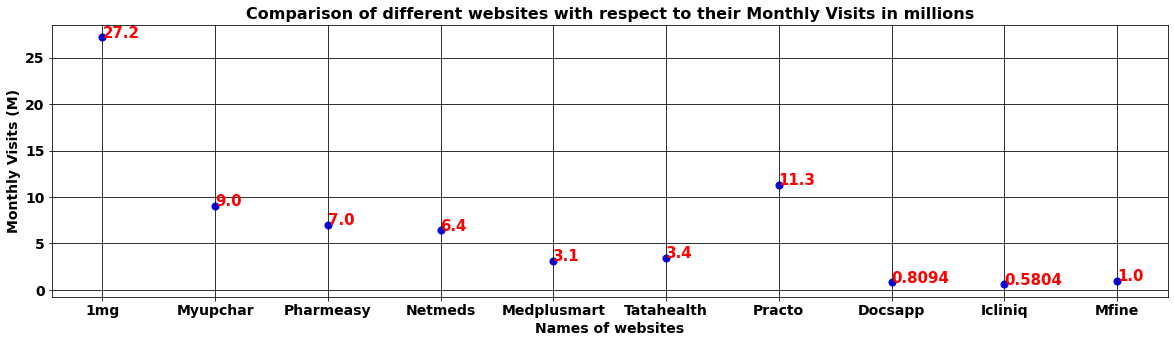

In [12]:
# Comparison of different websites with respect to their Monthly Visits (M)
plt.figure(figsize= (20, 5))
plt.scatter(data['Names'], data['Monthly Visits (M)'], color= 'blue', marker= '.', s= 200)
plt.title('Comparison of different websites with respect to their Monthly Visits in millions', fontsize= 16, fontweight= 'bold')
plt.xlabel('Names of websites', fontsize= 14, fontweight= 'bold')
plt.ylabel('Monthly Visits (M)', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 14, fontweight= 'bold')
plt.yticks(fontsize= 14, fontweight= 'bold')
plt.grid(color= 'black')
for x, y in zip(data['Names'], data['Monthly Visits (M)']):
  plt.text(x, y, str(y), color= 'red', fontsize= 15, fontweight= 'bold')
plt.show()

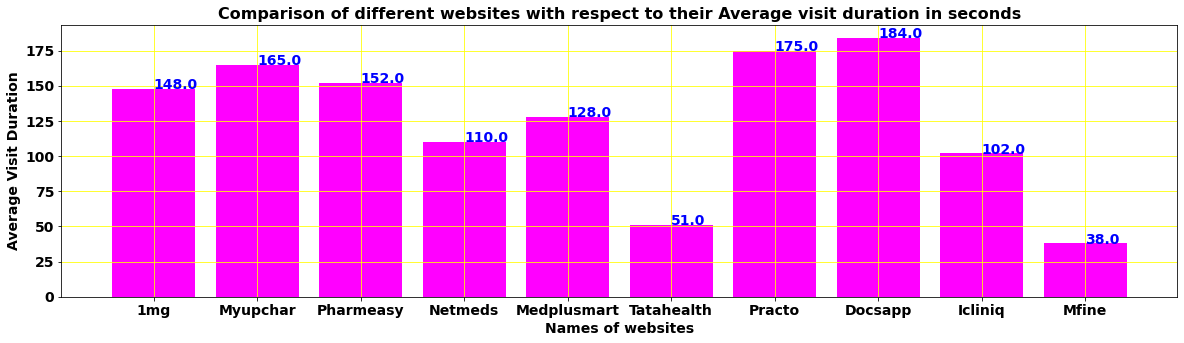

In [13]:
# Comparison of different websites with respect to their Avg. Visit Duration (s)
plt.figure(figsize= (20, 5))
plt.bar(data['Names'], data['Avg. Visit Duration (s)'], color= 'magenta')
plt.title('Comparison of different websites with respect to their Average visit duration in seconds', fontsize= 16, fontweight= 'bold')
plt.xlabel('Names of websites', fontsize= 14, fontweight= 'bold')
plt.ylabel('Average Visit Duration', fontsize= 14, fontweight= 'bold')
plt.xticks(fontsize= 14, fontweight= 'bold')
plt.yticks(fontsize= 14, fontweight= 'bold')
plt.grid(color= 'yellow')
for x, y in zip(data['Names'], data['Avg. Visit Duration (s)']):
  plt.text(x, y, str(y), color= 'blue', fontsize= 14, fontweight= 'bold')
plt.show()

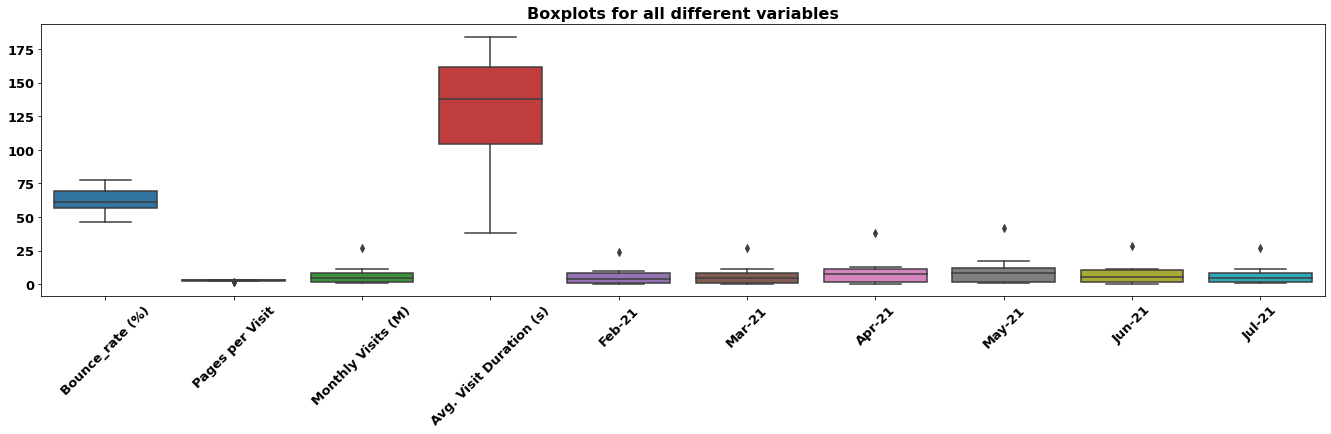

In [52]:
# Boxplots for different variables
plt.figure(figsize= (23, 5))
seaborn.boxplot(data= data)
plt.xticks(fontsize= 13, fontweight= 'bold', rotation= 45)
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.title('Boxplots for all different variables', fontsize= 16, fontweight= 'bold')
plt.show()

In [49]:
# Correlation matrix
correlation= data.corr()
correlation

,Bounce_rate (%),Pages per Visit,Monthly Visits (M),Avg. Visit Duration (s),Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21
Bounce_rate (%),1.000000,0.052822,-0.284807,-0.011588,-0.277449,-0.262769,-0.253756,-0.228617,-0.246417,-0.284985
Pages per Visit,0.052822,1.000000,0.373160,0.928086,0.394733,0.396136,0.351888,0.377803,0.413192,0.373775
Monthly Visits (M),-0.284807,0.373160,1.000000,0.368084,0.995377,0.997523,0.985829,0.975462,0.985481,0.999995
Avg. Visit Duration (s),-0.011588,0.928086,0.368084,1.000000,0.397443,0.389760,0.315700,0.337998,0.394212,0.369196
Feb-21,-0.277449,0.394733,0.995377,0.397443,1.000000,0.999079,0.969569,0.957909,0.973364,0.995557
Mar-21,-0.262769,0.396136,0.997523,0.389760,0.999079,1.000000,0.977754,0.967897,0.980168,0.997593
Apr-21,-0.253756,0.351888,0.985829,0.315700,0.969569,0.977754,1.000000,0.996839,0.992481,0.985407
May-21,-0.228617,0.377803,0.975462,0.337998,0.957909,0.967897,0.996839,1.000000,0.994540,0.974949
Jun-21,-0.246417,0.413192,0.985481,0.394212,0.973364,0.980168,0.992481,0.994540,1.000000,0.985256
Jul-21,-0.284985,0.373775,0.999995,0.369196,0.995557,0.997593,0.985407,0.974949,0.985256,1.000000


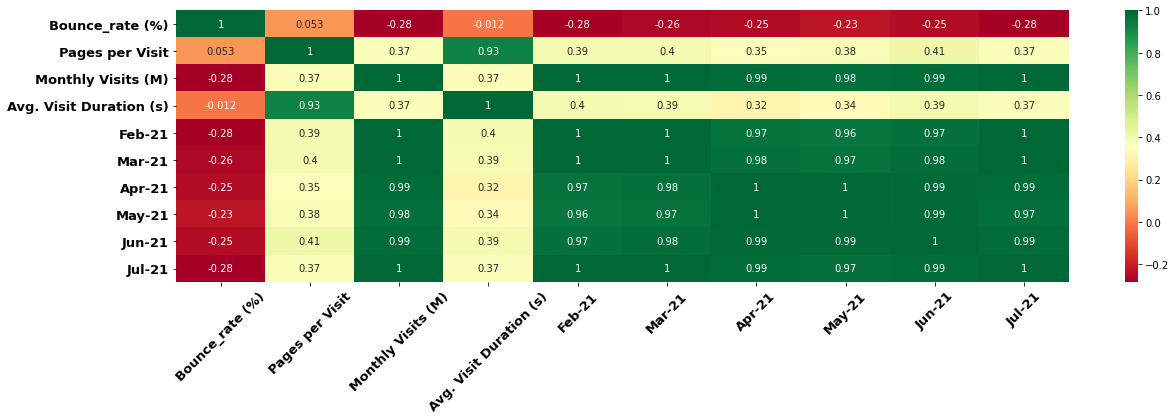

In [60]:
# Heatmap for correlation
plt.figure(figsize= (20, 5))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.xticks(fontsize= 13, fontweight= 'bold', rotation= 45)
plt.yticks(fontsize= 13, fontweight= 'bold')
plt.show()

### Conclusion : 
#### 1. Only Tatahealth has a fair bounce rate of 46.24 % .
#### 2. But apart from this 1mg website wins from other ones in every aspects like pages per visit, monthly visits, average visit duration. Also it has a bounce rate of 60.57 % which is not bad at all. 